<a href="https://colab.research.google.com/github/Lukwolf/Calgary-Crimes-Analysis/blob/main/Jupyter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation and Cleaning

## <span style="color:red;">Open this file in Google Colab to see plotly charts</span>



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import geopandas as gpd
from shapely.geometry import Point

## Import the Dataset

In [ ]:
df = pd.read_csv(r"Community_Crime_Statistics_20240130.csv")
display(df.head())

,Sector,Community Name,Category,Crime Count,Resident Count,Date,Year,Month,ID,Community Center Point
0,NORTHWEST,ARBOUR LAKE,Theft OF Vehicle,2,10619.0,2022/04,2022,APR,2022-APR-ARBOUR LAKE-Theft OF Vehicle,POINT (-114.20767498075155 51.1325947114686)
1,CENTRE,BANFF TRAIL,Theft OF Vehicle,2,4153.0,2023/10,2023,OCT,2023-OCT-BANFF TRAIL-Theft OF Vehicle,POINT (-114.11512839716917 51.07421633024228)
2,EAST,DOVER,Theft OF Vehicle,5,10351.0,2022/12,2022,DEC,2022-DEC-DOVER-Theft OF Vehicle,POINT (-113.99305400906283 51.02256772250409)
3,CENTRE,GREENVIEW,Assault (Non-domestic),2,1906.0,2020/12,2020,DEC,2020-DEC-GREENVIEW-Assault (Non-domestic),POINT (-114.05746990262463 51.09485613506574)
4,NORTHWEST,HAMPTONS,Theft FROM Vehicle,3,7382.0,2019/08,2019,AUG,2019-AUG-HAMPTONS-Theft FROM Vehicle,POINT (-114.14668419231347 51.14509283969437)


## Check for types

In [ ]:
df.dtypes

Sector                     object
Community Name             object
Category                   object
Crime Count                 int64
Resident Count            float64
Date                       object
Year                        int64
Month                      object
ID                         object
Community Center Point     object
dtype: object

## Transform 'Community Center Point' into 3 other columns for geospacial plots

In [ ]:
df['Community Center Point'].apply(type).value_counts()
df['Longitude'] = df['Community Center Point'].apply(lambda x: float(x.split()[1].lstrip('(')) if isinstance(x, str) else None)
df['Latitude'] = df['Community Center Point'].apply(lambda x: float(x.split()[2].rstrip(')')) if isinstance(x, str) else None)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.crs = "EPSG:4326"
gdf.head()

,Sector,Community Name,Category,Crime Count,Resident Count,Date,Year,Month,ID,Community Center Point,Longitude,Latitude,geometry
0,NORTHWEST,ARBOUR LAKE,Theft OF Vehicle,2,10619.0,2022/04,2022,APR,2022-APR-ARBOUR LAKE-Theft OF Vehicle,POINT (-114.20767498075155 51.1325947114686),-114.207675,51.132595,POINT (-114.20767 51.13259)
1,CENTRE,BANFF TRAIL,Theft OF Vehicle,2,4153.0,2023/10,2023,OCT,2023-OCT-BANFF TRAIL-Theft OF Vehicle,POINT (-114.11512839716917 51.07421633024228),-114.115128,51.074216,POINT (-114.11513 51.07422)
2,EAST,DOVER,Theft OF Vehicle,5,10351.0,2022/12,2022,DEC,2022-DEC-DOVER-Theft OF Vehicle,POINT (-113.99305400906283 51.02256772250409),-113.993054,51.022568,POINT (-113.99305 51.02257)
3,CENTRE,GREENVIEW,Assault (Non-domestic),2,1906.0,2020/12,2020,DEC,2020-DEC-GREENVIEW-Assault (Non-domestic),POINT (-114.05746990262463 51.09485613506574),-114.057470,51.094856,POINT (-114.05747 51.09486)
4,NORTHWEST,HAMPTONS,Theft FROM Vehicle,3,7382.0,2019/08,2019,AUG,2019-AUG-HAMPTONS-Theft FROM Vehicle,POINT (-114.14668419231347 51.14509283969437),-114.146684,51.145093,POINT (-114.14668 51.14509)


### Check for columns types

In [ ]:
df.dtypes

Sector                     object
Community Name             object
Category                   object
Crime Count                 int64
Resident Count            float64
Date                       object
Year                        int64
Month                      object
ID                         object
Community Center Point     object
Longitude                 float64
Latitude                  float64
dtype: object

### Check for nan values

In [ ]:
df.isna().sum()

Sector                    31
Community Name             0
Category                   0
Crime Count                0
Resident Count            69
Date                       0
Year                       0
Month                      0
ID                         0
Community Center Point    31
Longitude                 31
Latitude                  31
dtype: int64

### Data Shape

In [ ]:
df.shape

(67262, 12)

since the data has 67.262 rows and the max nan rows is 69, I am going to delete the NAN values, since they only represent 0.1% of the data

In [ ]:
df_clean = df.dropna(subset=['Resident Count'])

### Now I am going to check for NaN values

In [ ]:
df_clean.isna().sum()

Sector                    0
Community Name            0
Category                  0
Crime Count               0
Resident Count            0
Date                      0
Year                      0
Month                     0
ID                        0
Community Center Point    0
Longitude                 0
Latitude                  0
dtype: int64

## The next step is transform 'Date' column into a date-time type

In [ ]:
import warnings
warnings.filterwarnings("ignore")
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%Y/%m')
df_clean.dtypes

Sector                            object
Community Name                    object
Category                          object
Crime Count                        int64
Resident Count                   float64
Date                      datetime64[ns]
Year                               int64
Month                             object
ID                                object
Community Center Point            object
Longitude                        float64
Latitude                         float64
dtype: object

## Now I am going to display the new DataFrame, with no NaN values, Geo-Spacial columns and date-time format column

In [ ]:
df_clean

,Sector,Community Name,Category,Crime Count,Resident Count,Date,Year,Month,ID,Community Center Point,Longitude,Latitude
0,NORTHWEST,ARBOUR LAKE,Theft OF Vehicle,2,10619.0,2022-04-01,2022,APR,2022-APR-ARBOUR LAKE-Theft OF Vehicle,POINT (-114.20767498075155 51.1325947114686),-114.207675,51.132595
1,CENTRE,BANFF TRAIL,Theft OF Vehicle,2,4153.0,2023-10-01,2023,OCT,2023-OCT-BANFF TRAIL-Theft OF Vehicle,POINT (-114.11512839716917 51.07421633024228),-114.115128,51.074216
2,EAST,DOVER,Theft OF Vehicle,5,10351.0,2022-12-01,2022,DEC,2022-DEC-DOVER-Theft OF Vehicle,POINT (-113.99305400906283 51.02256772250409),-113.993054,51.022568
3,CENTRE,GREENVIEW,Assault (Non-domestic),2,1906.0,2020-12-01,2020,DEC,2020-DEC-GREENVIEW-Assault (Non-domestic),POINT (-114.05746990262463 51.09485613506574),-114.057470,51.094856
4,NORTHWEST,HAMPTONS,Theft FROM Vehicle,3,7382.0,2019-08-01,2019,AUG,2019-AUG-HAMPTONS-Theft FROM Vehicle,POINT (-114.14668419231347 51.14509283969437),-114.146684,51.145093
...,...,...,...,...,...,...,...,...,...,...,...,...
67257,EAST,SOUTHVIEW,Break & Enter - Commercial,1,1805.0,2023-12-01,2023,DEC,2023-DEC-SOUTHVIEW-Break & Enter - Commercial,POINT (-113.99733916298928 51.03415221260387),-113.997339,51.034152
67258,NORTH,SAGE HILL,Theft FROM Vehicle,1,7924.0,2023-12-01,2023,DEC,2023-DEC-SAGE HILL-Theft FROM Vehicle,POINT (-114.14068609335015 51.175616972779984),-114.140686,51.175617
67259,CENTRE,WINSTON HEIGHTS/MOUNTVIEW,Break & Enter - Commercial,1,3635.0,2023-12-01,2023,DEC,2023-DEC-WINSTON HEIGHTS/MOUNTVIEW-Break & Ent...,POINT (-114.04184874950579 51.075298802175126),-114.041849,51.075299
67260,CENTRE,SOUTH CALGARY,Street Robbery,1,4442.0,2023-12-01,2023,DEC,2023-DEC-SOUTH CALGARY-Street Robbery,POINT (-114.10207470148995 51.02680215136445),-114.102075,51.026802


In [ ]:
# df_clean.to_csv("Data.csv")

## Now I am going to calculate 'Crime Rate per 1000 people'

In [ ]:
crime_per_community = df_clean.groupby('Community Name').agg(
    total_crimes=pd.NamedAgg(column='Crime Count', aggfunc='sum'),
    resident_count=pd.NamedAgg(column='Resident Count', aggfunc='mean')
)

crime_per_community['crime_rate_per_1000'] = (crime_per_community['total_crimes'] / crime_per_community['resident_count']) * 1000
crime_per_community_sorted = crime_per_community.sort_values(by='crime_rate_per_1000', ascending=False)
crime_per_community = crime_per_community[crime_per_community['resident_count'] > 0]
crime_per_community['resident_count'] = crime_per_community['resident_count'].replace(0, crime_per_community['resident_count'].mean())
crime_per_community['resident_count'] = crime_per_community['resident_count'].fillna(crime_per_community['resident_count'].mean())
crime_per_community['crime_rate_per_1000'] = crime_per_community['crime_rate_per_1000'].round(2)

In [ ]:
# crime_per_community.to_csv("Data_2.csv")

# Questions to explore the data and Visualization

## In this section I am going to ask 5 questions, which will be a guide to explore the data

1. How are the categories of crimes distributed?

2. What are the sectors with the highest number of crimes and How are crimes distributed throughout the city?

3. How have crimes evolved over time?

4. What is the crime rate per capita?

5. What is the relationship between Crimes and population?

## Crimes by Category (Question 1)

To answer this question, I am going to create a pie chart to show the categories of crimes and their percentages

In [ ]:
df_clean.groupby('Category')['Crime Count'].sum().reset_index()

,Category,Crime Count
0,Assault (Non-domestic),24021
1,Break & Enter - Commercial,25868
2,Break & Enter - Dwelling,11468
3,Break & Enter - Other Premises,11987
4,Commercial Robbery,2029
5,Street Robbery,3636
6,Theft FROM Vehicle,71187
7,Theft OF Vehicle,31045
8,Violence Other (Non-domestic),12390


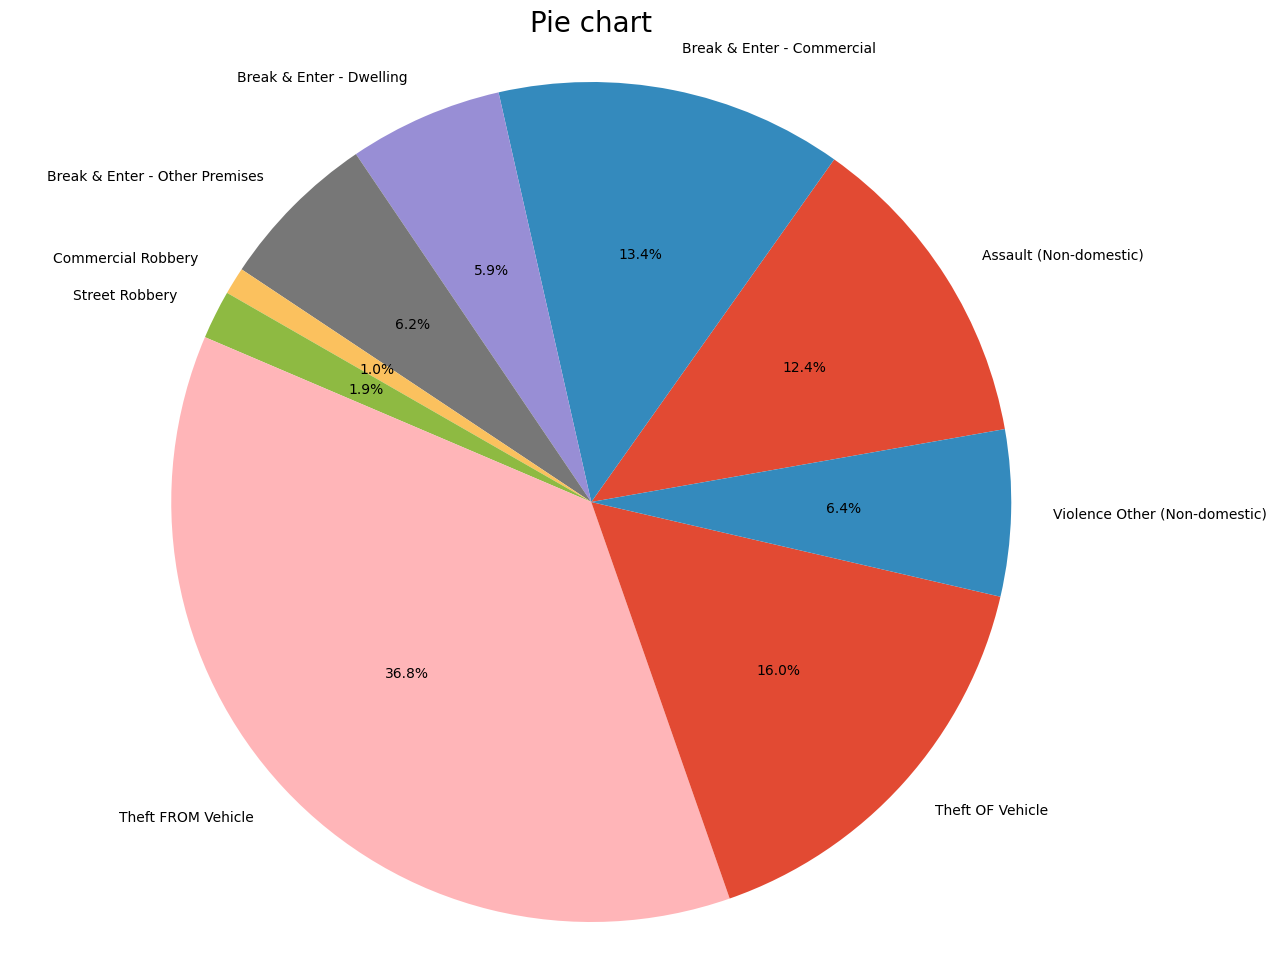

In [ ]:
a = df_clean.groupby('Category')['Crime Count'].sum().reset_index()
etiquetas = a['Category']
valores = a['Crime Count']

plt.style.use('ggplot')
plt.figure(figsize=(15, 12))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=10)
plt.title('Pie chart', size=20)
plt.axis('equal')
plt.show()

As we can see here, 'Theft From Vehicle' represents 36.8% of Calgary´s crimes, followed by 'Theft of Vehicle'. Both of them combine represent half of the crimes in Calgary

## Types of Crime by Sector (Question 2)

To answer this question, I am going to plot 2 charts. The first one showing crimes by sector and types, and the second one a geo-spacial plot of Calgary

In [ ]:
import pandas as pd
import plotly.graph_objects as go

pivot_data = df_clean.pivot_table(index='Sector', columns='Category', values='Crime Count', aggfunc='sum', fill_value=0)
categories = pivot_data.columns
sectors = pivot_data.index
data_for_plotting = []

for category in categories:
    data_for_plotting.append(
        go.Bar(
            name=category,
            x=sectors,
            y=pivot_data[category],
            marker=dict(
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        )
    )

fig = go.Figure(data=data_for_plotting)
fig.update_layout(
    barmode='stack',
    xaxis={'categoryorder': 'total descending'},
    title='Crime Counts by Sector and Category',
    xaxis_title="Sector",
    yaxis_title="Crime Counts",
    legend_title="Category",
    plot_bgcolor='rgba(0,0,0,0)',
    width=2000,
    height=1000
)

fig.show()

From this charts, we can see that thw top 2 sectors ith most crimes are 'Centre' and 'Northwest', with 'Theft from auto' being the most current crime in both locations.

Now I am going to plot an interactive geo spacial chart to see this in a more visual way

### Geo Spatial

In [ ]:
import plotly.express as px
geo_data = df_clean.groupby('Community Name').agg(
    {'Crime Count': 'sum', 'Latitude': 'mean', 'Longitude': 'mean'}).reset_index()

fig = px.scatter_mapbox(
    geo_data,
    lat='Latitude',
    lon='Longitude',
    color='Crime Count',
    hover_name='Community Name',
    color_continuous_scale=px.colors.cyclical.IceFire,
    zoom=10,
    mapbox_style="open-street-map",
    title='Crime Counts by Community Location',
    width=2000,
    height=1000
)

fig.update_traces(marker=dict(
    size=geo_data['Crime Count'] / geo_data['Crime Count'].max() * 60,
    color=geo_data['Crime Count'],
    colorscale='Viridis',
    showscale=True
))

fig.show()


As we can see here, most of the crimes are located at the centre of the city, followed by other regions

## Crimes over time (by Sector and Type of Crime)

To solve this question, I am going to display two line charts to show crimes over time by Sector and by type of crime

In [ ]:
import pandas as pd
import plotly.express as px

df_grouped = df_clean.groupby(['Sector', 'Date'])['Crime Count'].sum().reset_index()
fig = px.line(df_grouped, x='Date', y='Crime Count', color='Sector', title='Crime Count Over Time by Sector')
fig.update_layout(xaxis_title='Date', yaxis_title='Crime count', legend_title='Sector', width=2000, height=1000)
fig.show()


As we can see, crimes in general have been decreasing over time, in addition to highlighting that 'Centre' and 'Northeast' are the areas with the highest amount of crimes historically.

In [ ]:
import pandas as pd
import plotly.express as px

df_grouped = df_clean.groupby(['Category', 'Date'])['Crime Count'].sum().reset_index()
fig = px.line(df_grouped, x='Date', y='Crime Count', color='Category', title='Crime Count Over Time by Type')
fig.update_layout(xaxis_title='Date', yaxis_title='Crime count', legend_title='Category', width=2000, height=1000)
fig.show()

In this graph we can also see that the crimes have remained the same, with the exception of 'theft from vehicle', which is the category with the highest number of crimes historically. We can see that this category has been decreasing over time

## Crime Rate per Capita

To solve this question, I will create a tree map to show wich community of the city have the highest number of crimes per 1000 people

In [ ]:
df = pd.read_csv('Data_2.csv')

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('Data_2.csv')
fig = px.treemap(df, path=['Community Name'], values='crime_rate_per_1000')
fig.update_layout(title='Crime Rates per Capita', width=1500, height=1000)
fig.show()

As we can see here, 'Sunridge' is the community with most crimes per 1000 people, followed by 'Saddle Ridge Industrial'. This is an important information, because is different from the previous graphs form what we saw previously (showing that most crimes are located in the centre of the city)

## Relationship Between Crimes and People

For this question, I want to know if there is a relationship between the number of people and number of crimes. For this I will display a scatterplot using 'Resident Count' and the sum of 'Crime count'.

In [ ]:
import plotly.express as px
import pandas as pd

df = df_clean.groupby('Resident Count')['Crime Count'].sum().reset_index()
fig = px.scatter(df, x='Crime Count', y='Resident Count', trendline='ols')
fig.update_layout(title='Scatterplot con Línea de Tendencia')
fig.show()


In this graph, we can see that there is a relation between the number of people and crimes, but the next step is to eliminate those outliers, so we can see a more clear graph.

## Without Outliers

In [ ]:
import plotly.express as px
import pandas as pd

df = df[df['Crime Count'] < 5000].groupby('Resident Count')['Crime Count'].sum().reset_index()
df = df[df['Crime Count'] < 3000]

fig = px.scatter(df, x='Crime Count', y='Resident Count', trendline='ols')
fig.update_traces(line=dict(color='red'))
fig.update_layout(title='Scatterplot con Línea de Tendencia', height=1000, width=1700)
fig.show()

print("Correlation: " + str(round(df['Crime Count'].corr(df['Resident Count']),2)))

Correlation: 0.48


In [ ]:
# df.to_csv('Data_3.csv')

Now we can see that there is a possitive correlation between the number of residents and crime. I also calculated the correlation between these two variables, showing that the correlation is 0.48, confirming what the graph shows us